In [11]:
import torch
from torch.utils.data import random_split, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import pickle as pkl
import numpy as np
import random
import torchvision

random.seed(1)

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))])

In [3]:
def pickle_loader(path):
    with open(path, 'rb') as pickle_file:
        return pkl.load(pickle_file)
    
ds = datasets.DatasetFolder('../data/class_pkl/', pickle_loader, extensions='pkl')

length = len(ds)
ttsplit = int(np.floor(0.2*length))
idx = list(range(length))
np.random.shuffle(idx)
idx_train, idx_test = idx[ttsplit:], idx[:ttsplit]

In [14]:
sampler_train, sampler_test = SubsetRandomSampler(idx_train), SubsetRandomSampler(idx_test)

dl_train = torch.utils.data.DataLoader(ds, batch_size=4, shuffle=False, sampler=sampler_train,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
dl_test = torch.utils.data.DataLoader(ds, batch_size=4, shuffle=False, sampler=sampler_test,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)

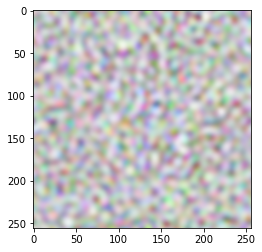

In [15]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(dl_train)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()